tgb - 3/2/2020 - Remaking Figures 9,10,S1,S2 for Noah using the norm file that was used for the coupled run of the unstable network 007 discussed in our UW manuscript

In [4]:
import math

import matplotlib as mpl
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pylab import *

import numpy as np

import pickle

import xarray as xr

# Load uwnet utilities (assumes a local symlink to uwnet utilities)
from uwnet.wave import *
from uwnet.spectra import *
from uwnet.plots.jacobian import plot

In [5]:
pathPKL = '/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/PKL_DATA/'
pathPDF = '/home/t/Tom.Beucler/'

# Figure 9

In [6]:
# Download appropriate data
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_9_LRF.pkl
!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_13_LRF.pkl
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_14_LRF.pkl
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_20_LRF.pkl
!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/2020_03_02_LRF_Unstable.pkl

# load
dataold = np.load('9_13_LRF.pkl', allow_pickle=True) # [0.01,0.025,0.05,0.1,0.25,0.5] # Perturbation amplitudes
dataunstab = np.load('2020_03_02_LRF_Unstable.pkl',allow_pickle=True)

--2020-03-02 21:38:30--  https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_13_LRF.pkl
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tbeucler/CBRAIN-CAM/master/notebooks/tbeucler_devlog/PKL_DATA/9_13_LRF.pkl [following]
--2020-03-02 21:38:30--  https://raw.githubusercontent.com/tbeucler/CBRAIN-CAM/master/notebooks/tbeucler_devlog/PKL_DATA/9_13_LRF.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 357819 (349K) [application/octet-stream]
Saving to: ‘9_13_LRF.pkl’

9_13_LRF.pkl        100%[===================>] 349.43K  --.-KB/s    in 0.04s   

2020-03-02 21:38:31 (9.18 MB/s) - ‘9_13_LRF.pkl’ sav

In [8]:
# Define custom functions to plot Jacobian and growth rates
def plot_lrf(data):
    # basic plot
    coupler = WaveCoupler.from_tom_data(data)
    p = lrf['base_state']['p'][::-1]
    plot((coupler.lrf.panes, p));
    plt.suptitle(name)
    
def plot_spectra(data, **kwargs):
    coupler = WaveCoupler.from_tom_data(data)
    eig = compute_spectrum(coupler)
    scatter_spectra(eig)
    
def eig_max_spectra(data):
    coupler = WaveCoupler.from_tom_data(data)
    eig = compute_spectrum(coupler)
    c_phi = eig.value.imag/eig.k
    gr = eig.value.real*86400 
    return gr.values[np.abs(c_phi.values)>5].max()

In [9]:
# Define variables for the plot
stday = 24*3600 # Covert from 1/s to 1/d
vmax = stday*1e-4 # Maximum value for LRF
vmin = -stday*1e-4 # Minimum value for LRF

i= 0
i= 1
i= 2
i= 3
i= 0
i= 1
i= 2
i= 3


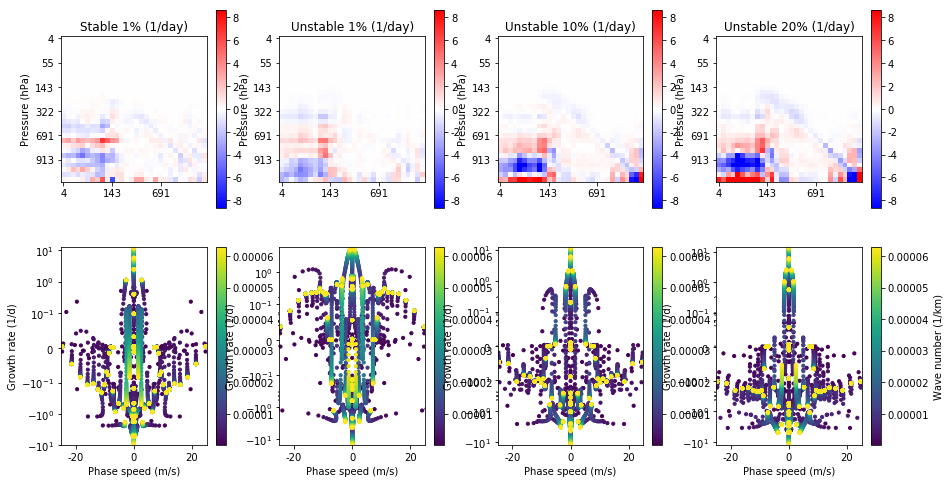

In [11]:
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,8))

toplot_nam = ['MeanLRF_stable','MeanLRF_unstable','MeanLRF_unstable','MeanLRF_unstable']
toplot_ind = [0,1,5,9] # Indices correspond to Perturbation amplitude arrays above
toplot_tit = ['Stable 1% (1/day)','Unstable 1% (1/day)','Unstable 10% (1/day)','Unstable 20% (1/day)']

for i in range(4):
    print('i=',i)
    
    if i==0: d = dataold;
    else: d = dataunstab;
    
    plt.subplot(2,4,i+1)
    plt.imshow(stday*d['linear_response_functions'][toplot_ind[i]][toplot_nam[i]]['q']['q'],
               cmap='bwr',vmin=vmin,vmax=vmax)
    plt.colorbar()
    plt.title(toplot_tit[i])
    plt.ylabel('Pressure (hPa)')
    plt.draw()
    # Change y labels to pressure
    labels = [item.get_text() for item in plt.gca().get_yticklabels()]
    for ilab,lab in enumerate(labels):
        IND = min(29,max(0,int(float(lab))))
        labels[ilab]=str('%01.0f'%d['base_state']['p'][IND])
    plt.gca().set_yticklabels(labels)
    # Change x labels to pressure
    labels = [item.get_text() for item in plt.gca().get_xticklabels()]
    for ilab,lab in enumerate(labels):
        IND = min(29,max(0,int(float(lab))))
        labels[ilab]=str('%01.0f'%d['base_state']['p'][IND])
    plt.gca().set_xticklabels(labels)
    
for i in range(4):
    print('i=',i)
    
    if i==0: d = dataold;
    else: d = dataunstab;
    
    plt.subplot(2,4,5+i)
    lrf = {'base_state': d['base_state'], 'jacobian': d['linear_response_functions'][toplot_ind[i]][toplot_nam[i]]}
    plot_spectra(lrf)
    plt.xlim([-25, 25])

# Figure 10

In [12]:
S = np.load(pathPKL+'2020_03_02_GR.pkl', allow_pickle=True)

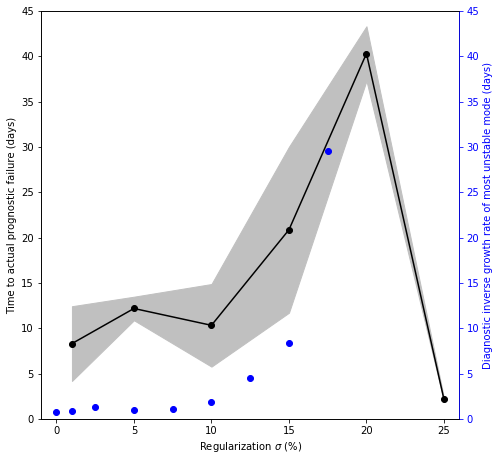

In [13]:
YMAX = 45 # Upper limit for y-axis
Input_reg = np.array([0.01,0.05,0.1,0.15,0.2,0.25])
# Hard-coded table of results from the 4 prognostic tests:
maxstep = np.array([[134,590,446,1499,2044,103], # Orig IC
                  [651,566,332,363,1686,95], # Jan12 IC
                  [512,678,337,840,2011,97], # Jan18 IC
                  [297,504,866,1304,1999,118]]) # Jan24 IC
themean = np.mean(maxstep,axis=0)/48
thestd = np.std(maxstep,axis=0)/48

fig,ax = plt.subplots(figsize=(7.5,7.5))
ax2 = ax.twinx()

# Shading goes in the back
ax.fill_between(100*Input_reg,themean-thestd,themean+thestd,color='silver')
ax.plot(100*Input_reg,themean,color='k')
ax.scatter(100*Input_reg,themean,color='k')
ax.set_ylabel('Time to actual prognostic failure (days)')
ax.set_xlabel ('Regularization $\sigma$ (%)'); 
ax.set_xlim((-1,26))
ax.set_ylim((0,YMAX))

ax2.scatter(100*S['Perturbation_std'],1/S['Growth_rate_daym1'],color='b')
ax2.set_ylim((0,YMAX))
ax2.set_ylabel('Diagnostic inverse growth rate of most unstable mode (days)',color='b')
ax2.spines['right'].set_color('b')
ax2.tick_params(axis='y', colors='b')

# Figure S1

In [14]:
NNname = 'UNSTAB'
path = pathPKL+'2_27_FigS1_'+NNname+'.pkl'
hf = open(path,'rb')
S = pickle.load(hf)

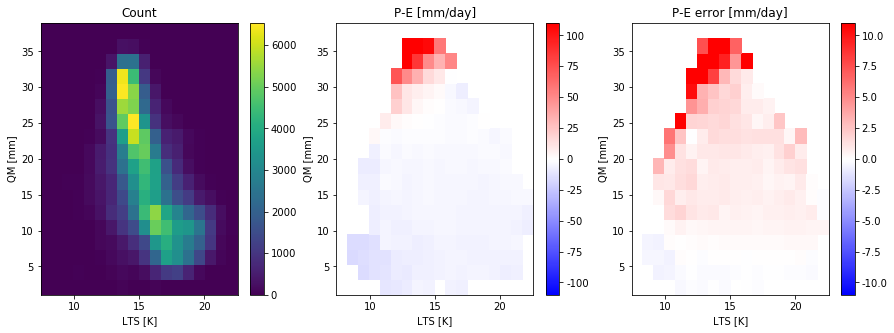

In [15]:
X = 0.5*(S['LTSspace'][:-1]+S['LTSspace'][1:])
Y = 0.5*(S['QMspace'][:-1]+S['QMspace'][1:])

option_array = ['Weights','Precip','Pano']

fig, ax = plt.subplots(1,3,figsize=(15,5))

for i,option in enumerate(option_array):
    
    if option=='Weights': C = S['Whist']; vlim=False; tit='Count'; cmaps = 'viridis'
    elif option=='Precip': C = S['PREChist'][NNname]; vlim=True; vmin = -110; vmax = 110; cmaps = 'bwr'; tit='P-E [mm/day]'
    elif option=='Heating': C = S['HEAThist'][NNname]; vlim=True; vmin = -3.5e3; vmax = 3.5e3; cmaps = 'bwr'; tit='Net heating [W/m2]'
    elif option=='Pano': C = S['PREChist'][NNname]-S['PREChist']['truth']; vlim=True; vmin = -11; vmax = 11; cmaps = 'bwr'; tit='P-E error [mm/day]'
    elif option=='Hano': C = S['HEAThist'][NNname]-S['HEAThist']['truth']; vlim=True; vmin = -70; vmax = 70; cmaps = 'bwr'; tit='Heating error [mm/day]'

    ax0 = ax[i]
    if vlim: im = ax0.pcolormesh(X, Y, C, vmin=vmin, vmax=vmax, cmap=cmaps)
    else: im = ax0.pcolormesh(X, Y, C, cmap=cmaps)

    plt.colorbar(im, ax=ax0)
    ax0.set_xlabel('LTS [K]')
    ax0.set_ylabel('QM [mm]')
    ax0.set_title(tit)

# Figure S2

In [16]:
# Download appropriate data
!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/8_19_LRF.pkl
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_13_LRF.pkl
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_14_LRF.pkl
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_20_LRF.pkl

# load
data_stab_0 = np.load('8_19_LRF.pkl', allow_pickle=True)

--2020-03-02 21:47:40--  https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/8_19_LRF.pkl
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tbeucler/CBRAIN-CAM/master/notebooks/tbeucler_devlog/PKL_DATA/8_19_LRF.pkl [following]
--2020-03-02 21:47:40--  https://raw.githubusercontent.com/tbeucler/CBRAIN-CAM/master/notebooks/tbeucler_devlog/PKL_DATA/8_19_LRF.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120084 (117K) [application/octet-stream]
Saving to: ‘8_19_LRF.pkl’

8_19_LRF.pkl        100%[===================>] 117.27K  --.-KB/s    in 0.03s   

2020-03-02 21:47:41 (4.17 MB/s) - ‘8_19_LRF.pkl’ sav

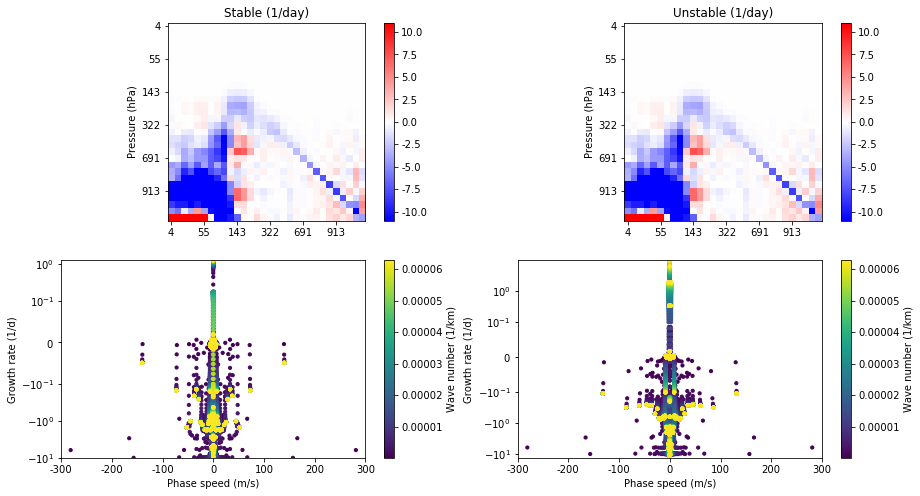

In [21]:
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,8))

toplot_nam = ['MeanLRF_stable','MeanLRF_unstable']
toplot_tit = ['Stable (1/day)','Unstable (1/day)']

for i in range(2):
    
    if i==0: d = data_stab_0; jac = d['linear_response_functions'][toplot_nam[i]] 
    elif i==1: d = dataunstab; toplot = d['linear_response_functions'][0][toplot_nam[i]]
    
    plt.subplot(2,2,i+1)
    plt.imshow(stday*jac['q']['q'],cmap='bwr',vmin=vmin,vmax=vmax)
    plt.colorbar()
    plt.title(toplot_tit[i])
    plt.ylabel('Pressure (hPa)')
    plt.draw()
    # Change y labels to pressure
    labels = [item.get_text() for item in plt.gca().get_yticklabels()]
    for ilab,lab in enumerate(labels):
        IND = min(29,max(0,int(float(lab))))
        labels[ilab]=str('%01.0f'%d['base_state']['p'][IND])
    plt.gca().set_yticklabels(labels)
    # Change x labels to pressure
    labels = [item.get_text() for item in plt.gca().get_xticklabels()]
    for ilab,lab in enumerate(labels):
        IND = min(29,max(0,int(float(lab))))
        labels[ilab]=str('%01.0f'%d['base_state']['p'][IND])
    plt.gca().set_xticklabels(labels)
    
for i in range(2):
    
    if i==0: d = data_stab_0
    elif i==1: d = dataunstab
    
    plt.subplot(2,2,3+i)
    lrf = {'base_state': d['base_state'], 'jacobian': jac}
    plot_spectra(lrf)
    plt.xlim([-300, 300])